In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Theo B.R.Theo_Barbara\Documents\GitHub\projeto_Cdata


In [3]:
data = pd.read_csv('PES2015.csv')
data.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


Iremos utilizar principalmente as variáveis UF (Unidade Federativa), V0302 (Sexo), V8005 (Idade do morador), V0403 (Número da família), V0404 (Cor ou raça), V0601 (Saber ler e escrever), V6002 (Rede de ensino), V6003 (Curso que frequenta), V6007 (Curso mais elevado que frequentou anterior), V4803 (Anos de estudo), V4713 (Condição de atividade no trabalho principal no período de referência de 365 dias para pessoas de 10 anos ou mais de idade).

In [4]:
data.UF

0         11
1         11
2         11
3         11
4         11
5         11
6         11
7         11
8         11
9         11
10        11
11        11
12        11
13        11
14        11
15        11
16        11
17        11
18        11
19        11
20        11
21        11
22        11
23        11
24        11
25        11
26        11
27        11
28        11
29        11
          ..
356874    53
356875    53
356876    53
356877    53
356878    53
356879    53
356880    53
356881    53
356882    53
356883    53
356884    53
356885    53
356886    53
356887    53
356888    53
356889    53
356890    53
356891    53
356892    53
356893    53
356894    53
356895    53
356896    53
356897    53
356898    53
356899    53
356900    53
356901    53
356902    53
356903    53
Name: UF, Length: 356904, dtype: int64

In [5]:
data_filtro = data[['UF', "V0302", "V8005", "V0403", "V0404", "V0601", "V6002", "V6003", "V6007", "V4803", "V4713"]][data["V8005"]>10][data["V8005"]<65]

C:\Users\Theo B.R.Theo_Barbara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
data_filtro.loc[(data_filtro.UF>10)&(data_filtro.UF<20), "REGIÃO"] = "Norte"
data_filtro.loc[(data_filtro.UF>20)&(data_filtro.UF<30), "REGIÃO"] = "Nordeste"
data_filtro.loc[(data_filtro.UF>30)&(data_filtro.UF<37), "REGIÃO"] = "Sudeste"
data_filtro.loc[(data_filtro.UF>40)&(data_filtro.UF<48), "REGIÃO"] = "Sul"
data_filtro.loc[(data_filtro.UF>49)&(data_filtro.UF<56), "REGIÃO"] = "Centro-Oeste"

In [26]:
data_filtro.UF = data_filtro.UF.astype('category')
data_filtro.V4713 = data_filtro.V4713.astype('category')
data_filtro.V6002 = data_filtro.V6002.astype('category')
data_filtro.V4803 = data_filtro.V4803.astype('category')


data_filtro.UF.cat.categories = ("Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco", "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal")
data_filtro.V4713.cat.categories = ("Economicamente ativas", "Não Economicamente ativas")
data_filtro.V6002.cat.categories = ("Pública", "Privada")
data_filtro.V4803.cat.categories = ("Sem instrução e menos de 1 ano", "1 ano", "2 anos", "3 anos", "4 anos", "5 anos", "6 anos", "7 anos", "8 anos", "9 anos", "10 anos", "11 anos", "12 anos", "13 anos", "14 anos", "15 anos ou mais", "Não determinados")


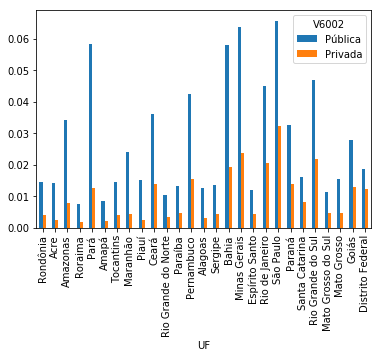

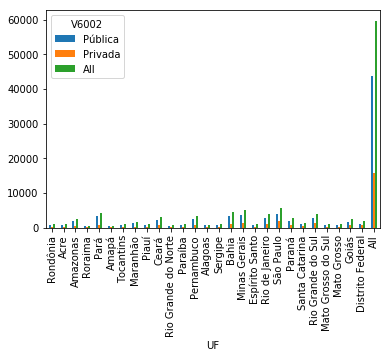

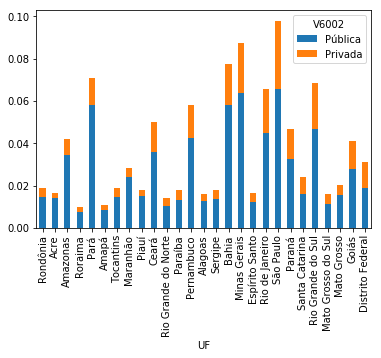

In [25]:
cross_1 = pd.crosstab(data_filtro.UF, data_filtro.V6002, normalize=True)
plot = cross_1.plot(kind='bar')
plot

cross_1_ = pd.crosstab(data_filtro.UF, data_filtro.V6002, margins=True)
plot_ = cross_1_.plot(kind='bar')
plot_

plot_2_ = cross_1.plot(kind='bar', stacked=True)
plot_2_

In [13]:
data_filtro.head()

,UF,V0302,V8005,V0403,V0404,V0601,V6002,V6003,V6007,V4803,V4713,REGIÃO
0,Rondônia,2,23,1,8,1,NaN,NaN,5.0,12,Economicamente ativas,Norte
1,Rondônia,4,23,1,2,1,NaN,NaN,5.0,12,Economicamente ativas,Norte
2,Rondônia,4,35,1,8,1,Privada,5.0,NaN,15,Economicamente ativas,Norte
3,Rondônia,2,34,1,8,1,NaN,NaN,8.0,15,Economicamente ativas,Norte
4,Rondônia,4,11,1,8,1,Privada,1.0,NaN,4,Não Economicamente ativas,Norte


In [27]:
pd.crosstab(data_filtro["UF"], data_filtro["V4713"])
pd.crosstab(data_filtro["REGIÃO"], data_filtro["V4713"], normalize="index", margins=True)*100

V4713,Economicamente ativas,Não Economicamente ativas
REGIÃO,,
Centro-Oeste,71.223275,28.776725
Nordeste,66.119481,33.880519
Norte,65.538231,34.461769
Sudeste,71.289307,28.710693
Sul,72.373531,27.626469
All,69.061097,30.938903
